Classification
========


Supervised learning classification is a type of machine learning where the goal is to build a model that can categorize input data into predefined classes or categories. In this approach, the algorithm is "supervised" because it learns from a labeled dataset, where each data point is associated with a class label indicating its category or class membership.

The primary objective of classification is to learn a decision boundary or a mapping function that can effectively separate different classes in the input data space. Once the model is trained on the labeled data, it can predict the class labels of new, unseen data points based on the patterns it has learned during training.

Commonly used classification algorithms include Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), and Neural Networks. The choice of algorithm depends on the nature of the data, the complexity of the decision boundary, and the interpretability requirements.

We will now see an example of a Classification problem, using scikit-learn to tackle it.
As usual, we will import numpy and matplotlib to manipulate and visualise the data

In [2]:
import matplotlib.pyplot as plt
import numpy as np

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. 

While in practice, datasets usually have many more features, it is hard to plot high-dimensional data on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

First, we will look at a two class classification problem in two dimensions, that is the problem of assigninga class value to each sample in the dataset.

For this quick example, we will use synthetic data generated by the ``make_blobs`` function from `sklearn`, which generates isotropic Gaussian blobs, given the sample size and number of features.

In [3]:
from sklearn.datasets import make_blobs

In [4]:
?make_blobs

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or ndarray of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers mus

First we generate some data

In [5]:
X, y = make_blobs(centers=2, random_state=0)

Then we visualise the shape of each array:

In [6]:
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])

(100, 2)
(100,)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
[1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in two-dimensional space, with the first feature being the x-axis and the second feature being the y-axis.

Text(0, 0.5, 'second feature')

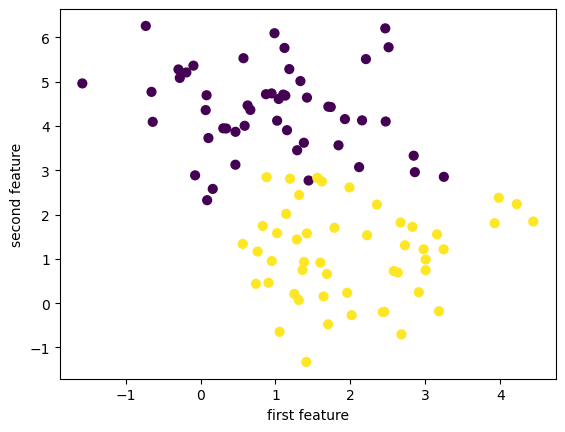

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")

As classification is a supervised task, and we are interested in how well the model generalises (i.e. predicts on new, unseen data), we split our data into a **training set**,
to build the model from, and a **test-set**, to evaluate how well our model performs on new data. 

The ``train_test_split`` function form the ``cross_validation`` module does that for us, by randomly splitting of 25% of the data for testing.

<img src="./resources/imgs/train_test_split.svg" width="80%">


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.4,
                                                    random_state=42,
                                                    stratify=y)

The `stratify` parameter helps maintaining the proportion of each class in the data. E.g. here we have 50% of the data belonging to class 1 and 50% in class 0.

In [9]:
len(y[y==0])

50

Let's have a look at the shape of the train and test data:

In [10]:
X_train.shape, X_test.shape

((60, 2), (40, 2))

In [11]:
y_train.shape, y_test.shape

((60,), (40,))

Half of the split data will still be in each class: 

In [12]:
len(y_train[y_train==0])

30

In [13]:
len(y_train[y_train==1])

30

In [14]:
len(y_test[y_test==0])

20

In [15]:
len(y_test[y_test==1])

20

Now, let's have a look at how the training and testing of a supervised learning model works:
- Feed **training data** (X) and **training labels** (y) into the model; 


Once the model is trained:
- Make predictions using the test data; 
- Evaluate the performance using test labels.

<img src="./resources/imgs/supervised_workflow.svg" width="60%" style="background: #4682B4">


## Scikit-Learn Estimator API

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a logistic regression is:

In [16]:
from sklearn.linear_model import LogisticRegression

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, True or False, class 0 or class 1, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. 

Within machine learning, logistic regression belongs to the family of supervised machine learning models. It is also considered a discriminative model, which means that it attempts to distinguish between classes (or categories). 

All models in scikit-learn have a very consistent interface.
First, we instantiate the estimator object.

In [17]:
classifier = LogisticRegression()

In [18]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
X_train.shape

(60, 2)

In [20]:
y_train.shape

(60,)

To build the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [21]:
classifier = classifier.fit(X_train, y_train)
classifier

LogisticRegression()

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [22]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [23]:
print(prediction)
print(y_test)

[0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 1]
[0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct (i.e. **accuracy**):

In [24]:
np.mean(prediction == y_test)

0.925

There is also a convenience function, ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [25]:
classifier.score(X_test, y_test)

0.925

In [1]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, prediction)

0.925

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [25]:
classifier.score(X_train, y_train)

0.95

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. 

In 2D, this simply means it finds a line to separate the blue from the red:

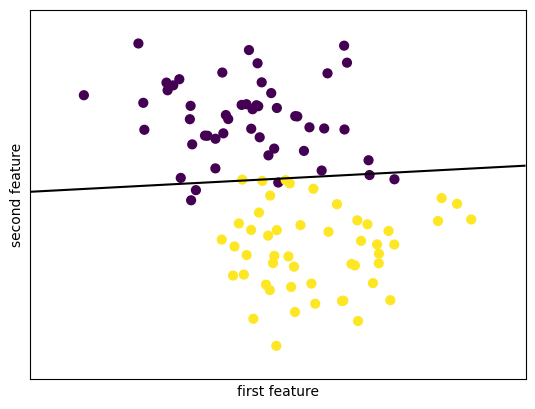

In [27]:
from utils import plot_2d_separator

plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)

**Estimated parameters**: All the estimated parameters are attributes of the estimator object, ending with an underscore. 

Here, these are the coefficients and the offset of the line:

In [28]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.19224349 -2.25749729]]
[6.18863718]


Another classifier: K Nearest Neighbors
------------------------------------------------

Another popular and easy to understand classifier is K nearest neighbors (kNN).  

It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for ``LogisticRegression``.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)

We fit the model with out training data

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

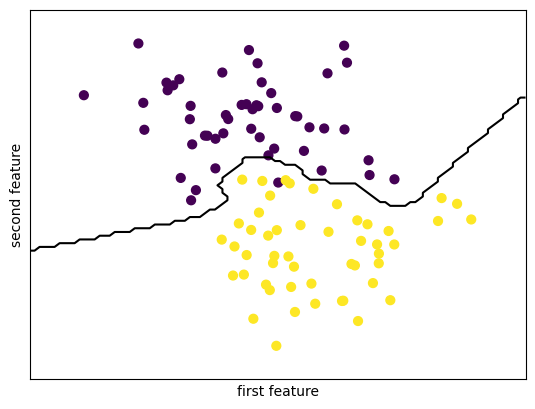

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)

And then we evaluate the score in the same way:

In [34]:
knn.score(X_test, y_test)

0.975

In [35]:
knn.score(X_train, y_train)

1.0

### Random Forest Classifier

Here we'll explore a class of algorithms based on decision trees.
Decision trees at their root are extremely intuitive.  They
encode a series of "if" and "else" choices, similar to how a person might make a decision.
However, which questions to ask, and how to proceed for each answer is entirely learned from the data.

For example, if you wanted to create a guide to identifying an animal found in nature, you
might ask the following series of questions:

- Is the animal bigger or smaller than a meter long?
    + *bigger*: does the animal have horns?
        - *yes*: are the horns longer than ten centimeters?
        - *no*: is the animal wearing a collar
    + *smaller*: does the animal have two or four legs?
        - *two*: does the animal have wings?
        - *four*: does the animal have a bushy tail?

and so on.  This binary splitting of questions is the essence of a decision tree.
One of the main benefit of tree-based models is that they require little preprocessing of the data.
They can work with variables of different types (continuous and discrete) and are invariant to scaling of the features.

Another benefit is that tree-based models are what is called "non-parametric", which means they don't have a fix set of parameters to learn. Instead, a tree model can become more and more flexible, if given more data.
In other words, the number of free parameters grows with the number of samples and is not fixed, as for example in linear models.


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=100)

In [46]:
rf.fit(X_train, y_train)

RandomForestClassifier()

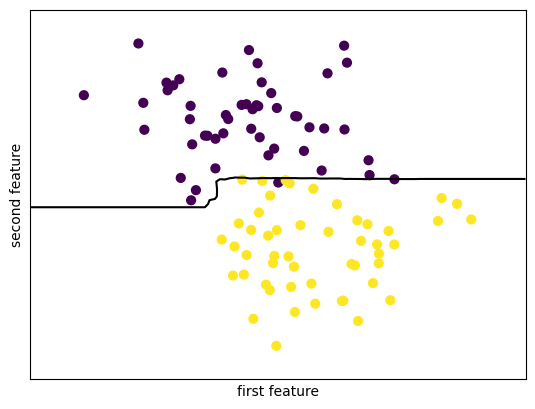

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rf, X)

In [41]:
rf.score(X_test, y_test)

0.975

Exercise 1 
=========
Apply the KNeighborsClassifier and RandomForest to the ``iris`` dataset. 
- Load the Data
- split the dataset in train and test subsets
- Train a KNeighborsClassifier and a RandomForestClassifier
- Play with different values of the ``n_neighbors`` in KNeighborsClassifier and observe how training and test score change.
- Play with different values of the ``n_estimators`` in the RandomForestClassifier and observe how training and test score change.
- print out the scores in the different cases

In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    return train_score, test_score

# Experiment with KNeighborsClassifier
print("Experimenting with KNeighborsClassifier:")
for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    train_score, test_score = train_and_evaluate_model(knn, X_train, X_test, y_train, y_test)
    print(f"n_neighbors = {n_neighbors}, Train score: {train_score:.4f}, Test score: {test_score:.4f}")

# Experiment with RandomForestClassifier
print("\nExperimenting with RandomForestClassifier:")
for n_estimators in [50, 100, 150, 200]:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    train_score, test_score = train_and_evaluate_model(rf, X_train, X_test, y_train, y_test)
    print(f"n_estimators = {n_estimators}, Train score: {train_score:.4f}, Test score: {test_score:.4f}")


Experimenting with KNeighborsClassifier:
n_neighbors = 1, Train score: 1.0000, Test score: 1.0000
n_neighbors = 2, Train score: 0.9667, Test score: 1.0000
n_neighbors = 3, Train score: 0.9500, Test score: 1.0000
n_neighbors = 4, Train score: 0.9583, Test score: 1.0000
n_neighbors = 5, Train score: 0.9667, Test score: 1.0000
n_neighbors = 6, Train score: 0.9667, Test score: 1.0000
n_neighbors = 7, Train score: 0.9750, Test score: 0.9667
n_neighbors = 8, Train score: 0.9583, Test score: 1.0000
n_neighbors = 9, Train score: 0.9667, Test score: 1.0000
n_neighbors = 10, Train score: 0.9833, Test score: 1.0000

Experimenting with RandomForestClassifier:
n_estimators = 50, Train score: 1.0000, Test score: 1.0000
n_estimators = 100, Train score: 1.0000, Test score: 1.0000
n_estimators = 150, Train score: 1.0000, Test score: 1.0000
n_estimators = 200, Train score: 1.0000, Test score: 1.0000


### Exercise: Email Spam Classification

Objective:
The objective of this exercise is to build a machine learning model that can classify emails as "spam" or "not spam" (ham) based on their attributes.

Data:
You can use the classic "Spambase" dataset available in Scikit-learn, which contains features extracted from email texts. The dataset is already preprocessed and ready for use.

Steps:

Load the Spambase dataset from Scikit-learn.
Split the data into training and test sets.
Choose a classification algorithm (e.g., Logistic Regression, Decision Trees, or Random Forests) and create a model using Scikit-learn.
Train the model using the training data.
Evaluate the model's performance on the test data using accuracy or other appropriate metrics.
Experiment with different hyperparameters and algorithms to see how the model's performance changes.
Challenge:
For an extra challenge, try to implement and evaluate multiple classifiers (e.g., Logistic Regression, Decision Trees, and Random Forests) to compare their performance.

Hints:

Use the train_test_split function from Scikit-learn to split the dataset into training and test sets.
Create a model using the chosen classifier, fit it to the training data, and then use it to predict the labels for the test data.
Use the accuracy_score function from Scikit-learn to evaluate the model's performance on the test data.